<b>Tout d'abord, nous devons importer les bibliothèques nécessaires<b>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
plt.style.use('ggplot')
sns.set_style("darkgrid")


<b>On vas lire le fichier CSV nommé Disney<b>

In [99]:
filex=pd.read_csv('disney.csv')

<b>Après , on affiche les dimensions du fichier CSV<b>

In [97]:
filex.shape

(1450, 12)

<b>On a besoin de visualiser les colonnes du csv file<br>

In [98]:
filex.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

<b>pour un meilleur affichage, il faut tout d'abord visualiser les cinq premières lignes de chaque colonne<b>

In [19]:
filex.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


<b>Avant de commencer la manipulation des donnees ils faut connaitre le type de chaque donnee <b>

In [58]:
filex.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

<b>Ici on visualize les 5 premieres lignes des categories nommées "listed_in"<b>

In [10]:
filex['listed_in'].head()

0                Animation, Family
1                           Comedy
2        Animation, Comedy, Family
3                          Musical
4    Docuseries, Historical, Music
Name: listed_in, dtype: object

<b>On utilise isna() pour verifier si il ya des valeurs manquantes<b>

In [59]:
filex.isna().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

<h1><u>Question 1<u><h1>

<b>en utlisant les librairies matplot et seaborn , on génére notre graphe pour afficher les 5 meilleures categorie<b>

Text(0.5, 1.0, 'Top des 5 categories de disney +')

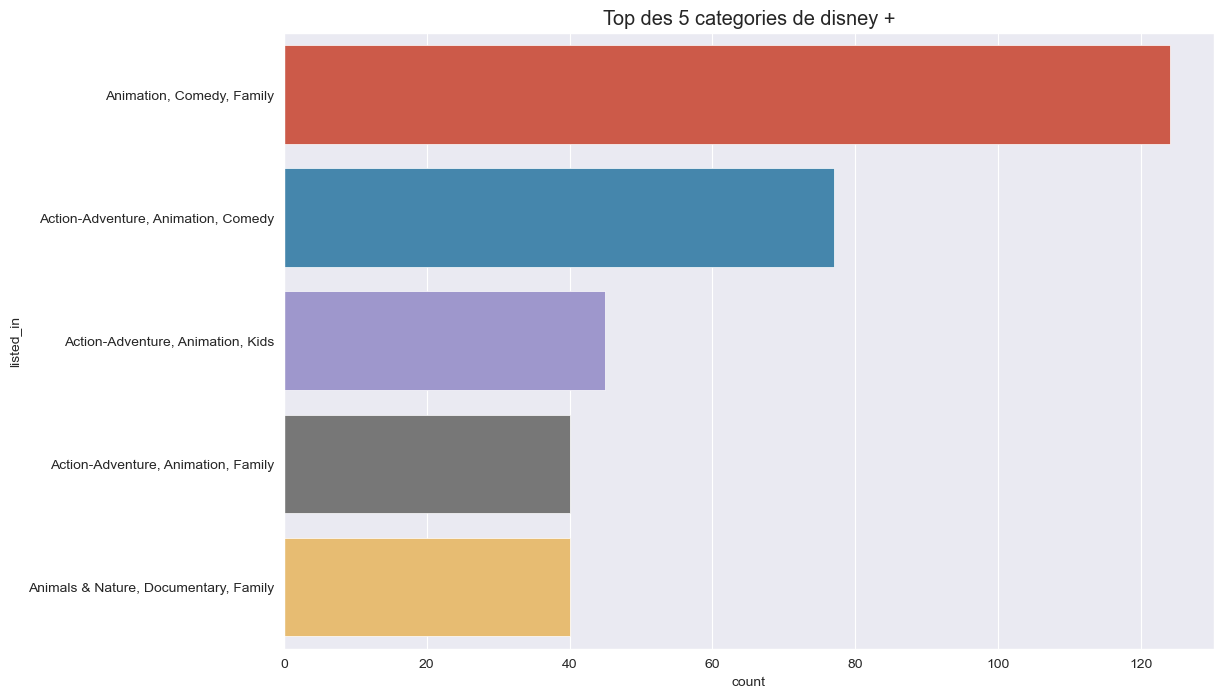

In [57]:
plt.figure(figsize =(12,8))
sns.countplot(y='listed_in',order=filex['listed_in'].value_counts().index[0:5], data=filex)
plt.title('Top des 5 categories de disney +')



<h1><u>Question 2<u><h1>

<b>nous nous concentrons ici sur la colonne des réalisateurs, d'abord, nous ordonnons la colonne filtrée, puis nous allons l'a filtrer par ordre pour obtenir les 5 meilleurs réalisateurs.<b>

Text(0.5, 1.0, 'top 5 meilleur realisateurs')

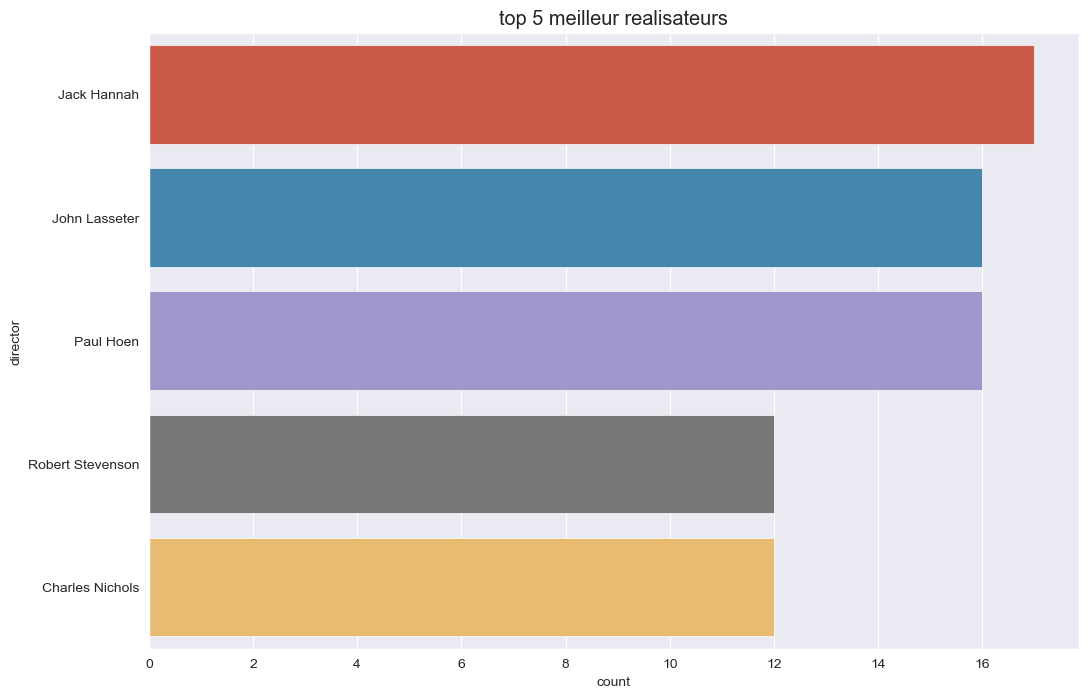

In [94]:
filterfilex=filex[filex['director']!='not found']
plt.figure(figsize=(12,8))
sns.countplot(y='director',order=filterfilex['director'].value_counts().index[0:5],data=filterfilex)
plt.title("top 5 meilleur realisateurs")

In [67]:
filex.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


<b>Ici , nous prenons d'abord une copie de la colonne ' cast', la nouvelle copie est nommée 'actor', nous séparons le nom des acteurs par des virgules en utilisant str.split(), puis nous utilisons 'explode()' pour faire de chaque nom ( actor's name ) sa propre ligne. ensuite on compte juste le nombre d'apparitions d'acteur et finalement  on visualise les résultats.<b>

In [100]:
filexcopy=filex.copy()
filexcopy['actor']=filexcopy['cast'].str.split(',')
filexcopy = filexcopy.explode('actor')
actorcounts =filexcopy['actor'].value_counts()
actorcounts


 Jim Cummings       24
 Corey Burton       15
Walt Disney         15
 Jeff Bennett       14
 Tress MacNeille    14
                    ..
 Lance Henriksen     1
Benjamin Bratt       1
 Eva Longoria        1
 Carlos Rivera       1
Charlie Tahan        1
Name: actor, Length: 4057, dtype: int64

Text(0.5, 1.0, 'Top 10 Actors On Disney')

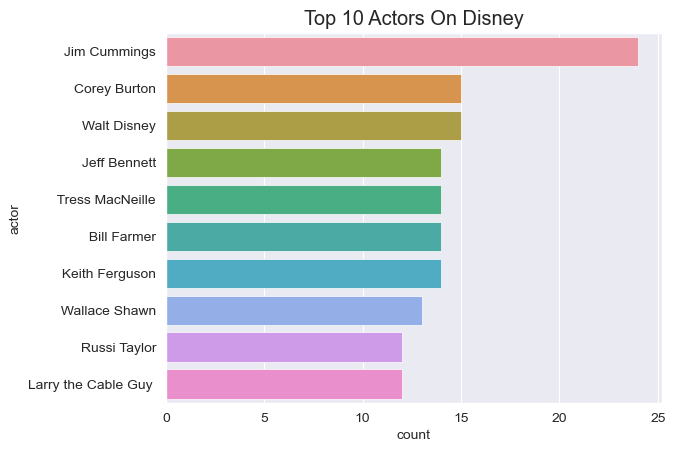

In [87]:
sns.countplot(y='actor',order=actorcounts.index[0:10], data=filexcopy)
plt.title('Top 10 Actors On Disney')

<h1><u>Question 3<u><h1>

<b>Nous allons nous concentrer sur le type "TV shows", puis nous trions les valeurs par la durée, qui contient le nombre de saisons, enfin nous allons afficher les 5 premiers résultats.<b>

In [74]:
top_series = filex[filex['type'] == 'TV Show'].sort_values(by='duration', ascending=False).head(5)
print(top_series[['title', 'duration']])

                              title   duration
553  America's Funniest Home Videos  9 Seasons
125        Dr. K's Exotic Animal ER  9 Seasons
557                     Brain Games  8 Seasons
285                         Car SOS  8 Seasons
759                 Boy Meets World  7 Seasons


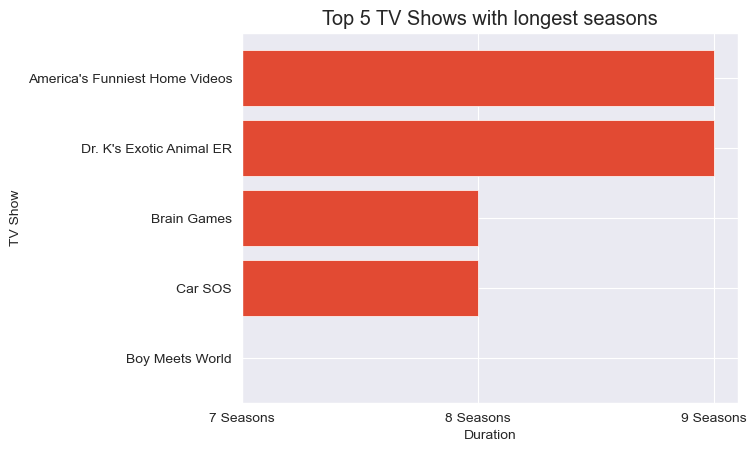

In [101]:


top_series = filex[filex['type'] == 'TV Show'].sort_values(by='duration', ascending=False).head(5)
top_series = top_series.iloc[::-1]
plt.barh(top_series['title'], top_series['duration'])

plt.title('Top 5 TV Shows with longest seasons')
plt.xlabel('Duration')
plt.ylabel('TV Show')

#
plt.show()


<h1><u>Question 4<u><h1>

<b>pour identifier des contenus similaires en faisant correspondre des caractéristiques textuelles. on va se focaliser sur la colonne description , puis on va comparer les caractères composant la description de chaque type, finalement on va imprimer les résultats</b>

Reference Content 😊
show_id                                                        s1
type                                                        Movie
title            Duck the Halls: A Mickey Mouse Christmas Special
director                        Alonso Ramirez Ramos, Dave Wasson
cast            Chris Diamantopoulos, Tony Anselmo, Tress MacN...
country                                                       NaN
date_added                                      November 26, 2021
release_year                                                 2016
rating                                                       TV-G
duration                                                   23 min
listed_in                                       Animation, Family
description      Join Mickey and the gang as they duck the halls!
Name: 0, dtype: object

Similar Contents 😊
show_id                                                     s1098
type                                                      TV Show
title        

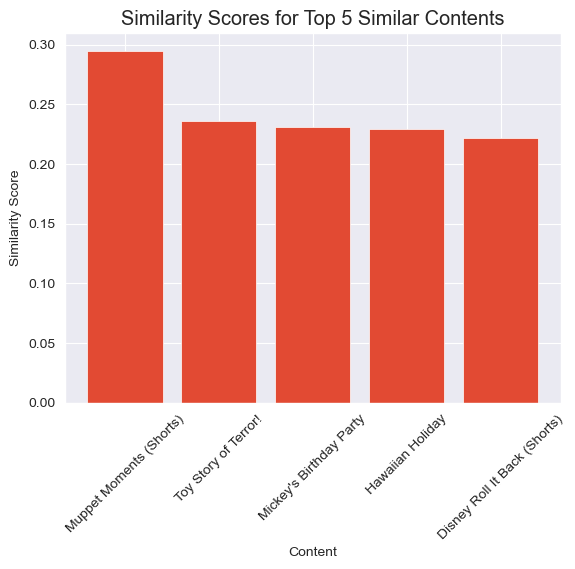

In [93]:
descriptions = filex['description'].fillna('')  

vectorizer = TfidfVectorizer()
description_vectors = vectorizer.fit_transform(descriptions)
similarity_matrix = cosine_similarity(description_vectors)
content_index = 0
similar_contents = similarity_matrix[content_index].argsort()[::-1][1:]
similar_content_indices = similar_contents[:5]
print("Reference Content 😊")
print(filex.iloc[content_index])


print("\nSimilar Contents 😊")
for index in similar_content_indices:
    print(filex.iloc[index])

similarities = similarity_matrix[content_index][similar_content_indices]
plt.bar(filex.iloc[similar_content_indices]['title'], similarities)

plt.title('Similarity Scores for Top 5 Similar Contents')
plt.xlabel('Content')
plt.ylabel('Similarity Score')


plt.xticks(rotation=45)

# Show the plot
plt.show()


<h1><u>Question 5<u><h1>

<b>tout simplement on va just compter le nobre des types dans le fichier csv
ON REMARQUE QUE LE TYPE DOMINANT DANS DISNEY + EST LES FILMS <b> 

Text(0.5, 1.0, 'best type')

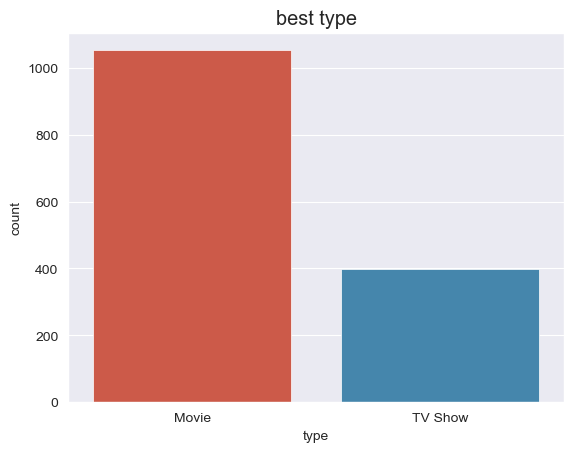

In [96]:
sns.countplot(x='type',data=filex)
plt.title('best type')

<h1>Réalisé par :<h1>

<li>DIAE EDDINE JAMAL<li>EL YAZID EL MERZOUKI<li>ALI EL JOUALI <br>
[last contributer is a woman]<br>
RIM BELABADIA or something (nobody cares)

